# ESTADISTICAS DEL SISTEMA DE CONSULTAS WEB


In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
from sqlalchemy import engine

engine = engine.create_engine('mssql+pyodbc://IPSDB-Replica/Noticias?driver=ODBC+Driver+17+for+SQL+Server')
FECHA_DESDE = '2024-02-01'
FECHA_HASTA = '2024-08-01'
CATEGORIA = 4

In [3]:
consulta = f"""SELECT c.* FROM CONSULTAS C LEFT OUTER JOIN SUBCATEGORIA_CONSULTAS S 
ON S.CATEGORIA_ID=C.SUBCATEGORIA_ID LEFT OUTER JOIN CATEGORIAS CA 
ON CA.ID = S.CATEGORIA_ID WHERE C.created_at >= '{FECHA_DESDE}' AND C.created_at < '{FECHA_HASTA}'"""

df = pd.read_sql(consulta, engine)

In [4]:
df["created_at"] = df["created_at"].astype("datetime64[ns]")

<BarContainer object of 6 artists>

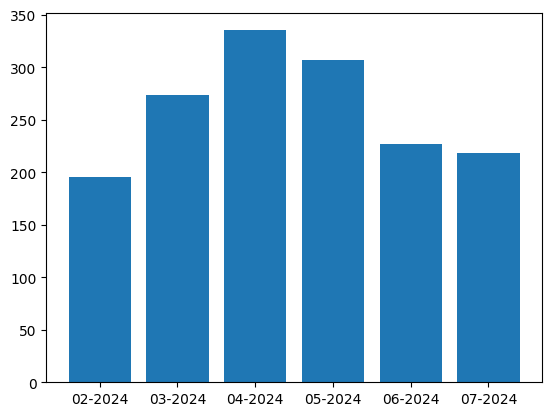

In [5]:
import matplotlib.pyplot as plt

mensual = df.groupby(df["created_at"].dt.strftime("%m-%Y")).count()

plt.bar(x=mensual.index, height=mensual["id"])

In [6]:
# mes actual

# generar barras de consultas para el corriente mes

df.groupby(pd.Grouper(key="created_at", freq="M")).count()


C:\Users\25030055\AppData\Local\Temp\ipykernel_37240\1934194623.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.groupby(pd.Grouper(key="created_at", freq="M")).count()


,id,nombreyapellido,cuil,telefono_cliente,mail_cliente,consulta,estado,token,subcategoria_id,deleted_at,updated_at,id_responsable,recibo_digital_id
created_at,,,,,,,,,,,,,
2024-02-29,195,195,195,195,195,195,195,195,195,0,195,117,195
2024-03-31,273,273,273,273,273,273,273,273,273,0,273,149,273
2024-04-30,335,335,335,335,335,335,335,335,335,0,335,132,335
2024-05-31,307,307,307,307,307,307,307,307,307,0,307,109,307
2024-06-30,227,227,227,227,227,227,227,227,227,0,227,116,227
2024-07-31,218,218,218,218,218,218,218,218,218,0,218,129,218
